In [64]:
import warnings 
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, DiscriminationThreshold, PrecisionRecallCurve,ROCAUC
import scikitplot as skplt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [42]:
def viz_performance(X_train, X_test, y_train, y_test, clf, classes, figsize=(12, 16), cmap='Greens'):

    fig, ax = plt.subplots(3, 2, figsize=figsize)
    
    lr = clf.fit(X_train, y_train)
    y_probas = lr.predict_proba(X_test)
    skplt.metrics.plot_ks_statistic(y_test, y_probas, ax=ax[2,1])
    
    grid = [
        ConfusionMatrix(clf, ax=ax[0, 0], classes=classes, cmap=cmap),
        ClassificationReport(clf, ax=ax[0, 1], classes=classes, cmap=cmap ),
        PrecisionRecallCurve(clf, ax=ax[1, 0]),
        ROCAUC(clf, ax=ax[1, 1], micro=False, macro=False, per_class=True, classes=classes),
        DiscriminationThreshold(clf, ax=ax[2,0])
    ]
    
    for viz in grid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()

    plt.tight_layout()
    plt.show()

In [61]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_INTER_PATH = os.path.join('..','data','interim') 
DATA_INTER_TRAIN_A1 = 'train_inter_a1.csv'
DATA_INTER_TEST = 'df_test.csv'
DATA_INTER_VAL_2 = 'df_raw2.csv'
DATA_PREV = 'df_prev.csv'
IMG_PATH = os.path.abspath(os.path.join('..','reports', 'figures'))

In [3]:
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_A1))
df_train.shape

(19093, 21)

In [4]:
df_test = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TEST))
df_test.shape

(8184, 24)

In [5]:
remove_features = ['fatura_abr', 'fatura_mai', 'fatura_jun']

In [6]:
df_test.drop(remove_features, axis=1, inplace=True)

__Modelagem__

In [11]:
rf = RandomForestClassifier(random_state=123, n_jobs=-1)

In [12]:
target = 'Y'

In [13]:
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

In [37]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6024  342]
 [1174  644]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6366
           1       0.65      0.35      0.46      1818

    accuracy                           0.81      8184
   macro avg       0.75      0.65      0.67      8184
weighted avg       0.80      0.81      0.79      8184



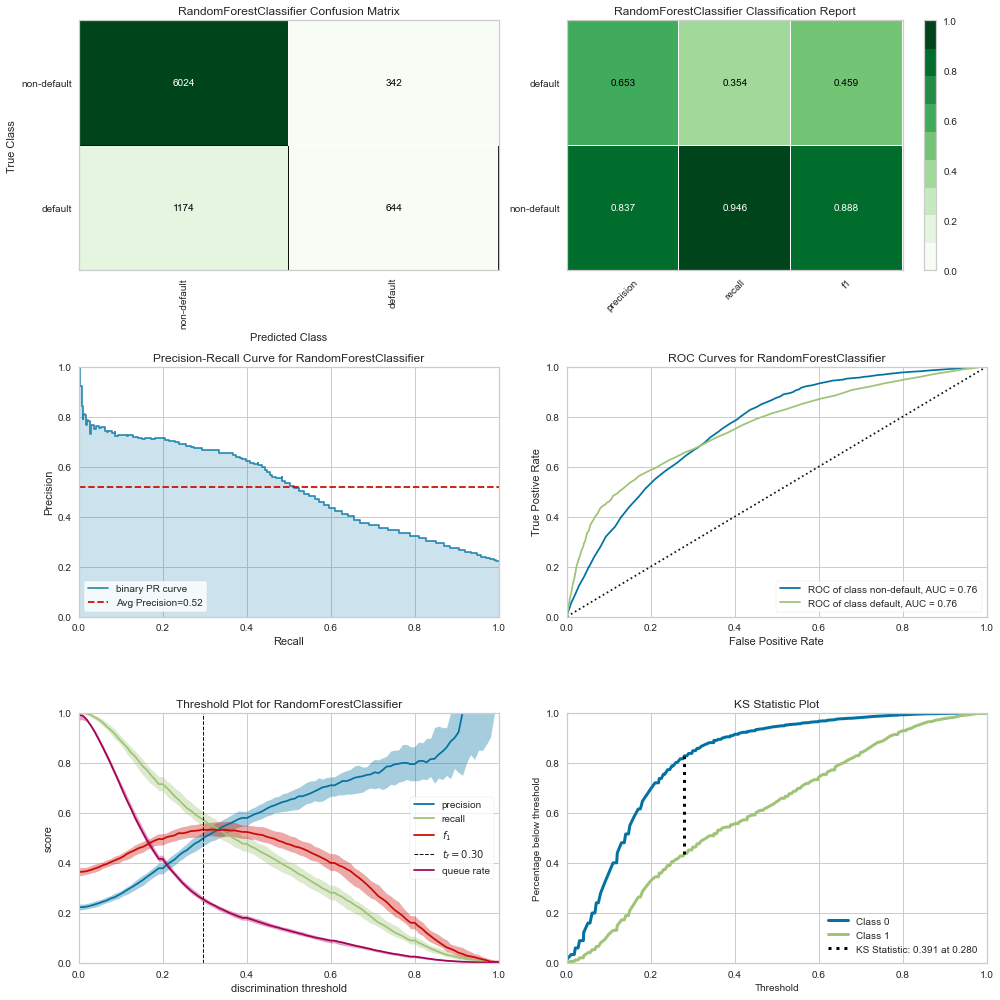

<Figure size 432x288 with 0 Axes>

In [49]:
viz_performance(X_train, X_test, y_train, y_test, rf, ['non-default', 'default'], figsize=(14,14))
plt.savefig(os.path.join(IMG_PATH,'metricas.png'), format='png')

### Aplicando modelo no segundo dataset de teste para prever pagamento ou não do cliente.

In [51]:
df_train_2 = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_VAL_2))
df_train_2.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,pgto_abr,fatura_set,fatura_ago,fatura_jul,fatura_jun,fatura_mai,fatura_abr,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr
0,70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,2007,3582,0,3601,0,1820
1,230000,2,1,2,27,-1,-1,-1,-1,-1,-1,16646,17265,13266,15339,14307,36923,17270,13281,15339,14307,37292,0
2,50000,1,2,2,33,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1718,1500,1000,1000,1000,716
3,50000,1,1,2,29,2,2,2,2,2,2,24987,24300,26591,25865,27667,28264,0,2700,0,2225,1200,0
4,10000,1,2,1,56,2,2,2,0,0,0,2097,4193,3978,4062,4196,4326,2300,0,150,200,200,160


In [52]:
df_train_2.drop(remove_features, axis=1, inplace=True)
df_train_2.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,pgto_abr,fatura_set,fatura_ago,fatura_jul,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr
0,70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,2007,3582,0,3601,0,1820
1,230000,2,1,2,27,-1,-1,-1,-1,-1,-1,16646,17265,13266,17270,13281,15339,14307,37292,0
2,50000,1,2,2,33,2,0,0,0,0,0,30518,29618,22102,1718,1500,1000,1000,1000,716
3,50000,1,1,2,29,2,2,2,2,2,2,24987,24300,26591,0,2700,0,2225,1200,0
4,10000,1,2,1,56,2,2,2,0,0,0,2097,4193,3978,2300,0,150,200,200,160


In [54]:
df_train_2.shape

(2723, 20)

In [56]:
y_pred_2 = rf.predict(df_train_2)

In [58]:
df_train_2['Y'] = y_pred_2

In [60]:
df_train_2['Y'].value_counts()

0    2396
1     327
Name: Y, dtype: int64

In [65]:
#Salvando dataset de provavéis pagadores
df_train_2.to_csv(os.path.join(DATA_INTER_PATH, DATA_PREV), index=False)

__Premissas de negócio__
1. "Queremos fazer uma cobrança ativa, ou seja, antecipar o contato com o cliente para evitar o não pagamento".
2. Quando o cliente pagar a fatura integralmente, nós teremos um lucro de aproximadamente 5$\%$ do valor da fatura. Se o cliente não paga, a gente perde todo o valor da fatura."

- __Verdadeiro Positivo__: Acertos do modelo de clientes que são default.
                           Ações: realizar ligação para renegociar a dívida
                           Custo: -R$ 50,00 da ligação + 5% da fatura renegociada
                           
- __Verdadeiro Negativo__: Acertos do modelo de clientes não default
                           Ações: Não realizar ligação
                           Custo: 5% da fatura 
                           
- __Falso Positivo__: Erros do modelo. Identifica clientes não default como clientes default.
                           Ações: realizar ligação para renegociar a dívida
                           Custo: -R$ 50,00 + 5% da fatura
                           
- __Falso Negativo__: Erros do modelo. Identifica como não default clientes que de fato serão default.
                           Ações: Não realizar ligação
                           Custo: - valor total da  fatura
                           

De acordo com o modelo de negócios ou regras, o custo mensurável no domínio do problema será diferente de acordo com a classificação do cliente. O custo da comunicação incorreta de um cliente varia de acordo com a eficiência da equipe que estará renegociando, neste caso, pressupõe-se que toda operação de cobrança será efetiva. A situação em que o banco sofre uma perda maior é que quando ocorre um falso negativo, ou seja, o banco para de contatar o cliente e o mesmo passará a ser um cliente inadimplente no próximo mês, e o banco perderá todo o valor.

Outro ponto a ser ressaltado está relacionado ao fato de que ligar para um cliente inadimplente pode prejudicar o relacionamento entre o cliente e a empresa, podendo incorrer em custos além do escopo do projeto, como o desligamento do cliente da empresa, caluniar os instrumentos de comunicação da empresa. A abordagem ideal é identificar clientes com identidades incertas e fazer contato menos intrusivos e de menor custo, como e-mails e mensagens de texto, para indicar que se o cliente não puder pagar, indica que a instituição financeira pretende renegociar a dívida.